In [1]:
import numpy as np
import scipy
from activ import load_data
from activ.readfile import load_preprocessed, TrackTBIFile, encode
from activ.data_normalization import data_normalization
import pandas as pd
from sklearn import preprocessing
from collections import Counter
import h5py
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.pylab as pl

In [53]:
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=0)
X_10, y_10 = make_blobs(n_samples=1000, centers=10, n_features=2, random_state=0)
X_15, y_15 = make_blobs(n_samples=1000, centers=15, n_features=2, random_state=0)
X_20, y_20 = make_blobs(n_samples=1000, centers=20, n_features=2, random_state=0)
X_25, y_25 = make_blobs(n_samples=1000, centers=25, n_features=2, random_state=0)
X_30, y_30 = make_blobs(n_samples=1000, centers=30, n_features=2, random_state=0)


In [54]:
TrackTBIFile.write('/Users/ahyeon/data/activ/sim5_data.h5', X, X)
TrackTBIFile.write('/Users/ahyeon/data/activ/sim10_data.h5', X_10, X_10)
TrackTBIFile.write('/Users/ahyeon/data/activ/sim15_data.h5', X_15, X_15)
TrackTBIFile.write('/Users/ahyeon/data/activ/sim20_data.h5', X_20, X_20)
TrackTBIFile.write('/Users/ahyeon/data/activ/sim25_data.h5', X_25, X_25)
TrackTBIFile.write('/Users/ahyeon/data/activ/sim30_data.h5', X_30, X_30)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

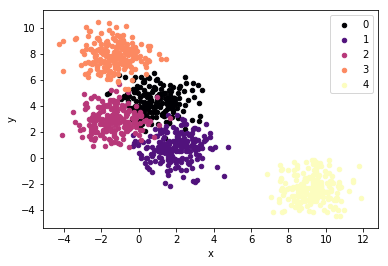

In [49]:
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
key = np.arange(5)
n = len(key)
colors = pl.cm.magma(np.linspace(0,1,n))
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [3]:
def conf_alliter(size, predicted, actual):
    confalliter = []
    for j in range(50):
        conf = np.zeros((size,size))
        labs = list(map(int, actual[j][size-2]))
        preds = list(map(int, predicted[j][size-2]))
        for l, p in zip(labs, preds):
            conf[l,p] += 1
        confalliter.append(conf)
    return confalliter

def accuracy(mat):
    return mat.trace()/mat.sum()

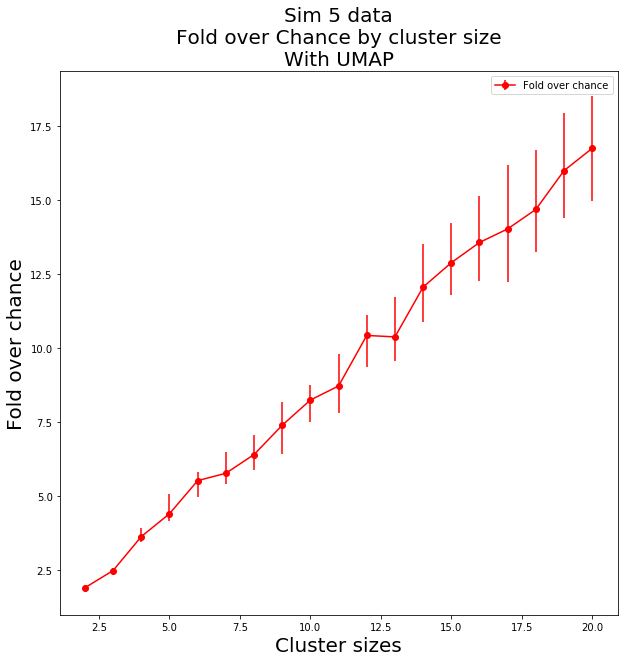

In [13]:
# sim5

fname = '/Users/ahyeon/Desktop/activ misc/sim5_umap_results.h5'
f = h5py.File(fname, 'r')
acc = np.squeeze(f['score'][:], axis=1)
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
cluster_sizes = f['cluster_sizes'][:]
labels = np.squeeze(f['clusters'][:], axis=1)
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc


plt.rcParams["figure.figsize"] = [10,10]
cmap = plt.get_cmap("tab10")
lower = np.asarray([np.percentile(fold_over_chance[i,:], 25) for i in range(len(cluster_sizes))])
upper = np.asarray([np.percentile(fold_over_chance[i,:], 75) for i in range(len(cluster_sizes))])
med = np.median(fold_over_chance, axis=1)
raw_med = np.median(raw_acc, axis=1)
raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(len(cluster_sizes))]
raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(len(cluster_sizes))]
norm_med = np.median(normalized_acc, axis=1)
norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(len(cluster_sizes))]
norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(len(cluster_sizes))]
yerr = upper-lower

plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')

plt.title("Sim 5 data\nFold over Chance by cluster size\nWith UMAP", fontsize=20)
plt.xlabel("Cluster sizes", fontsize=20)
plt.ylabel("Fold over chance", fontsize=20)
plt.legend()

plt.savefig('/Users/ahyeon/Desktop/activ misc/sim5_umap_foc.pdf')

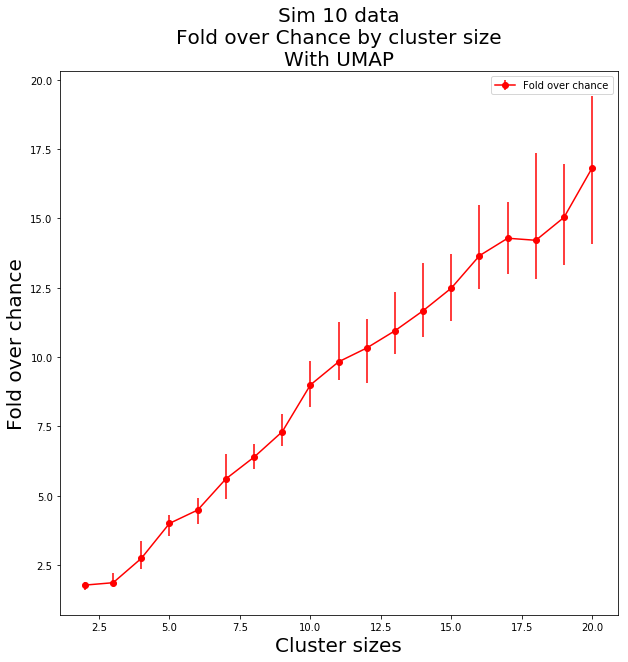

In [12]:
# sim10

fname = '/Users/ahyeon/Desktop/activ misc/sim10_umap_results.h5'
f = h5py.File(fname, 'r')
acc = np.squeeze(f['score'][:], axis=1)
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
cluster_sizes = f['cluster_sizes'][:]
labels = np.squeeze(f['clusters'][:], axis=1)
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc


plt.rcParams["figure.figsize"] = [10,10]
cmap = plt.get_cmap("tab10")
lower = np.asarray([np.percentile(fold_over_chance[i,:], 25) for i in range(len(cluster_sizes))])
upper = np.asarray([np.percentile(fold_over_chance[i,:], 75) for i in range(len(cluster_sizes))])
med = np.median(fold_over_chance, axis=1)
raw_med = np.median(raw_acc, axis=1)
raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(len(cluster_sizes))]
raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(len(cluster_sizes))]
norm_med = np.median(normalized_acc, axis=1)
norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(len(cluster_sizes))]
norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(len(cluster_sizes))]
yerr = upper-lower

plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')

plt.title("Sim 10 data\nFold over Chance by cluster size\nWith UMAP", fontsize=20)
plt.xlabel("Cluster sizes", fontsize=20)
plt.ylabel("Fold over chance", fontsize=20)
plt.legend()

plt.savefig('/Users/ahyeon/Desktop/activ misc/sim10_umap_foc.pdf')

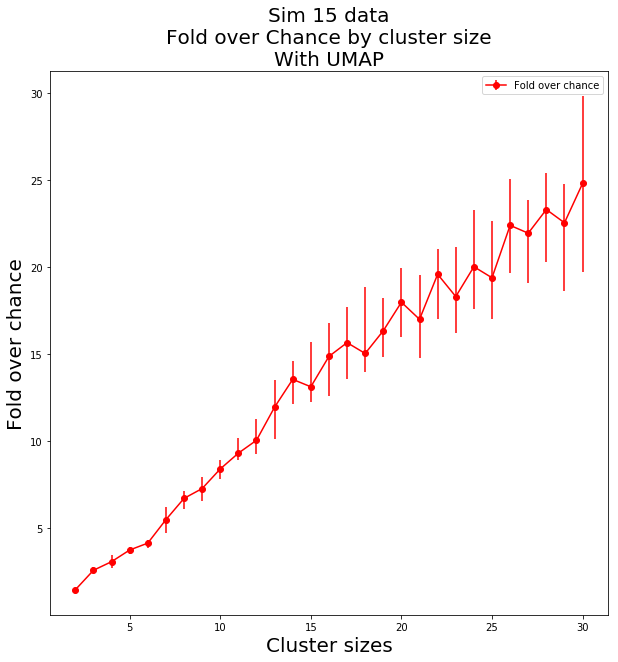

In [11]:
# sim15

fname = '/Users/ahyeon/Desktop/activ misc/sim15_umap_results.h5'
f = h5py.File(fname, 'r')
acc = np.squeeze(f['score'][:], axis=1)
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
cluster_sizes = f['cluster_sizes'][:]
labels = np.squeeze(f['clusters'][:], axis=1)
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc


plt.rcParams["figure.figsize"] = [10,10]
cmap = plt.get_cmap("tab10")
lower = np.asarray([np.percentile(fold_over_chance[i,:], 25) for i in range(len(cluster_sizes))])
upper = np.asarray([np.percentile(fold_over_chance[i,:], 75) for i in range(len(cluster_sizes))])
med = np.median(fold_over_chance, axis=1)
raw_med = np.median(raw_acc, axis=1)
raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(len(cluster_sizes))]
raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(len(cluster_sizes))]
norm_med = np.median(normalized_acc, axis=1)
norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(len(cluster_sizes))]
norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(len(cluster_sizes))]
yerr = upper-lower

plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')

plt.title("Sim 15 data\nFold over Chance by cluster size\nWith UMAP", fontsize=20)
plt.xlabel("Cluster sizes", fontsize=20)
plt.ylabel("Fold over chance", fontsize=20)
plt.legend()

plt.savefig('/Users/ahyeon/Desktop/activ misc/sim15_umap_foc.pdf')

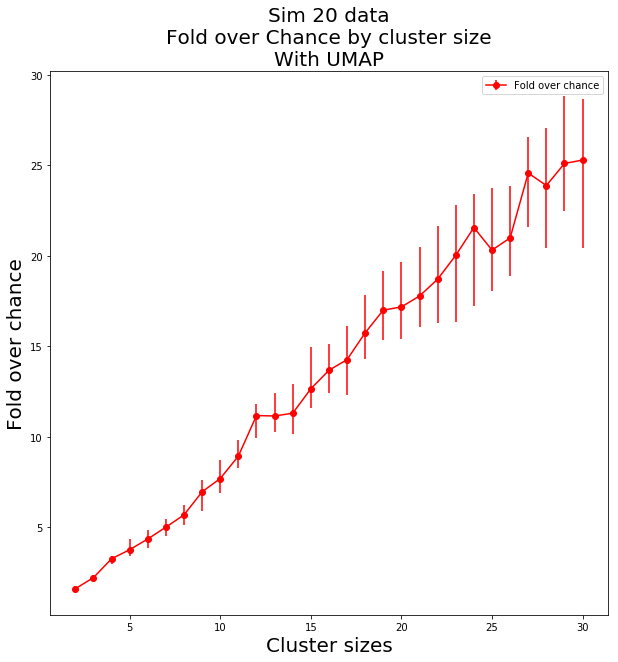

In [10]:
# sim20

fname = '/Users/ahyeon/Desktop/activ misc/sim20_umap_results.h5'
f = h5py.File(fname, 'r')
acc = np.squeeze(f['score'][:], axis=1)
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
cluster_sizes = f['cluster_sizes'][:]
labels = np.squeeze(f['clusters'][:], axis=1)
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc


plt.rcParams["figure.figsize"] = [10,10]
cmap = plt.get_cmap("tab10")
lower = np.asarray([np.percentile(fold_over_chance[i,:], 25) for i in range(len(cluster_sizes))])
upper = np.asarray([np.percentile(fold_over_chance[i,:], 75) for i in range(len(cluster_sizes))])
med = np.median(fold_over_chance, axis=1)
raw_med = np.median(raw_acc, axis=1)
raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(len(cluster_sizes))]
raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(len(cluster_sizes))]
norm_med = np.median(normalized_acc, axis=1)
norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(len(cluster_sizes))]
norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(len(cluster_sizes))]
yerr = upper-lower

plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')

plt.title("Sim 20 data\nFold over Chance by cluster size\nWith UMAP", fontsize=20)
plt.xlabel("Cluster sizes", fontsize=20)
plt.ylabel("Fold over chance", fontsize=20)
plt.legend()

plt.savefig('/Users/ahyeon/Desktop/activ misc/sim20_umap_foc.pdf')

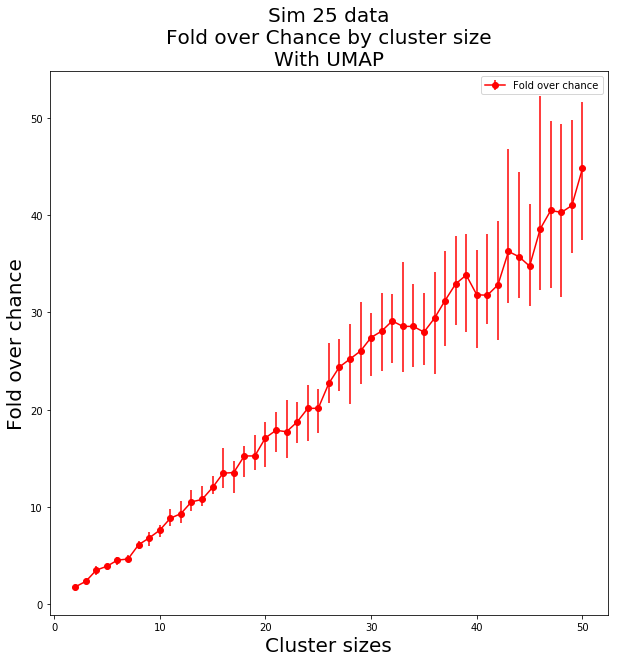

In [14]:
# sim25

fname = '/Users/ahyeon/Desktop/activ misc/sim25_umap_results.h5'
f = h5py.File(fname, 'r')
acc = np.squeeze(f['score'][:], axis=1)
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
cluster_sizes = f['cluster_sizes'][:]
labels = np.squeeze(f['clusters'][:], axis=1)
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc


plt.rcParams["figure.figsize"] = [10,10]
cmap = plt.get_cmap("tab10")
lower = np.asarray([np.percentile(fold_over_chance[i,:], 25) for i in range(len(cluster_sizes))])
upper = np.asarray([np.percentile(fold_over_chance[i,:], 75) for i in range(len(cluster_sizes))])
med = np.median(fold_over_chance, axis=1)
raw_med = np.median(raw_acc, axis=1)
raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(len(cluster_sizes))]
raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(len(cluster_sizes))]
norm_med = np.median(normalized_acc, axis=1)
norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(len(cluster_sizes))]
norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(len(cluster_sizes))]
yerr = upper-lower

plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')

plt.title("Sim 25 data\nFold over Chance by cluster size\nWith UMAP", fontsize=20)
plt.xlabel("Cluster sizes", fontsize=20)
plt.ylabel("Fold over chance", fontsize=20)
plt.legend()

plt.savefig('/Users/ahyeon/Desktop/activ misc/sim25_umap_foc.pdf')

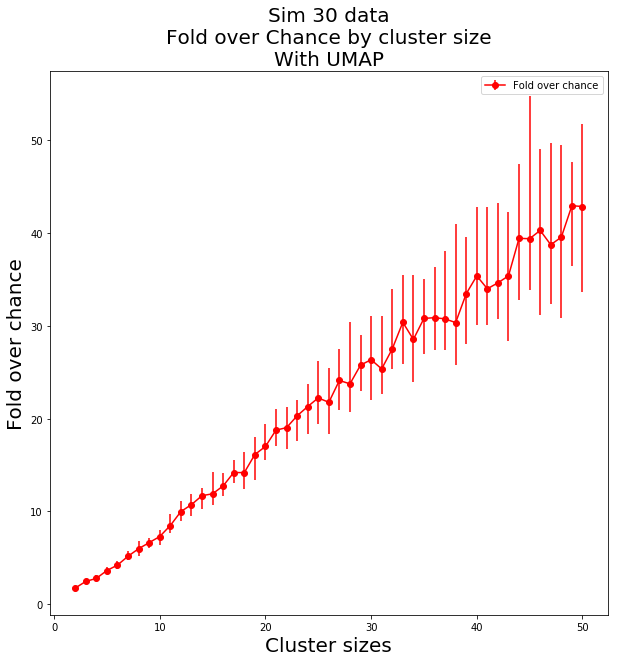

In [15]:
# sim30

fname = '/Users/ahyeon/Desktop/activ misc/sim30_umap_results.h5'
f = h5py.File(fname, 'r')
acc = np.squeeze(f['score'][:], axis=1)
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
cluster_sizes = f['cluster_sizes'][:]
labels = np.squeeze(f['clusters'][:], axis=1)
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc


plt.rcParams["figure.figsize"] = [10,10]
cmap = plt.get_cmap("tab10")
lower = np.asarray([np.percentile(fold_over_chance[i,:], 25) for i in range(len(cluster_sizes))])
upper = np.asarray([np.percentile(fold_over_chance[i,:], 75) for i in range(len(cluster_sizes))])
med = np.median(fold_over_chance, axis=1)
raw_med = np.median(raw_acc, axis=1)
raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(len(cluster_sizes))]
raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(len(cluster_sizes))]
norm_med = np.median(normalized_acc, axis=1)
norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(len(cluster_sizes))]
norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(len(cluster_sizes))]
yerr = upper-lower

plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')

plt.title("Sim 30 data\nFold over Chance by cluster size\nWith UMAP", fontsize=20)
plt.xlabel("Cluster sizes", fontsize=20)
plt.ylabel("Fold over chance", fontsize=20)
plt.legend()

plt.savefig('/Users/ahyeon/Desktop/activ misc/sim30_umap_foc.pdf')